<a href="https://colab.research.google.com/github/siddharthbharthulwar/ml_DSM/blob/master/cornerresponse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

img = imread('test.png')
imggray = rgb2gray(img)



In [0]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)


In [0]:
import scipy.ndimage as ndi

Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)

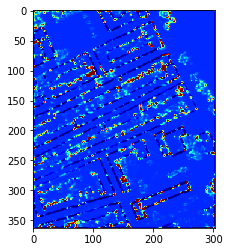

In [40]:
k = 0.05
# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = (detA - k * traceA ** 2) * 100

plt.imshow(harris_response, cmap = 'jet', vmin = -0.5, vmax = 2.5)
plt.show()